# Final Project IMDB score

K-State Honor Code:
**J. Ha "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.    
    
    
Your name:  Jaeyoung Ha

## 1. Business understanding

### 1.1 Background

There is much interest in how movie makers want to boost the success of their movies since many investors and stakeholders spend billions of dollars on making movies. In this regard, the prediction of success movie plays a significant role in the benefit and profits of film industries. With this prediction, movie producers effectively promote their movies and save their budget. 

### 1.2 How to predict the success of movie?

Many underlying factors drive the success of movies. As a business analyst, it is important to collect data and analyze data within the limited data and budget. In general, we can assume several factors that could result in the success of movies. 1) First of all, the popularity of the director could be one of the predictors that affect the success of movies. This is because people have more reliability of movies directed by famous movie directors. 2) Secondly, the popularity of actors plays a significant role in promoting the success of movies. Folks have more reliability of movies acted by famous actresses and actors. 3) Lastly, the budget of the movie could be an important factor to drive the success of movies since producers are more likely to spend more money on promotion or increase the quality of movies in terms of CG or narration.

## 2. Data understanding

At first, we have to understand what types of  data set we have and how to utilize.

### 2.1 Load the python package and data

In [95]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df = pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### 2.2 Data identification

We need to check basic decriptitve statistics of IMDB

In [97]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Now, we look at whether data has duplicated row and I get rid of all duplicated data.

In [98]:
len(df[df.duplicated()])

45

In [99]:
df = df.drop_duplicates(keep=False)
len(df)

4953

We need to identify types of data and whether data has missing value.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 5042
Data columns (total 28 columns):
color                        4934 non-null object
director_name                4851 non-null object
num_critic_for_reviews       4905 non-null float64
duration                     4938 non-null float64
director_facebook_likes      4851 non-null float64
actor_3_facebook_likes       4930 non-null float64
actor_2_name                 4940 non-null object
actor_1_facebook_likes       4946 non-null float64
gross                        4089 non-null float64
genres                       4953 non-null object
actor_1_name                 4946 non-null object
movie_title                  4953 non-null object
num_voted_users              4953 non-null int64
cast_total_facebook_likes    4953 non-null int64
actor_3_name                 4930 non-null object
facenumber_in_poster         4940 non-null float64
plot_keywords                4802 non-null object
movie_imdb_link              4953 non-

- We have 16 numerical variables and 12 catetorical variables. And we have many missing variables.

## 3. Data preparation

### 3.1 To find missing values & delete missing values

Throughout the data information function, we can identify the number of missing values. Now, it is time to count how the number of missing values is.

In [101]:
df.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        48
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        864
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                151
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               299
budget                       482
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 325
movie_facebook_likes           0
dtype: int64

- There are several missing values we have to clean up.

Drop the missing values

In [102]:
df_rev = df.dropna()
df_rev.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

- Now, we clean up all the missing values.

### 3.2 Tidy up the categorization of Genres (Delete parts of string after specific words) 

The column of the genre has a substantial amount of unnecessary information. I delete all unnecessary information and recategorize this.

In [103]:
from io import StringIO
import pandas as pd

In [104]:
df_rev['genres'] = df_rev['genres'].apply(lambda x: x.split('|')[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [105]:
df_rev.groupby('genres').size().sort_values(ascending=False).head(20)

genres
Comedy         979
Action         943
Drama          650
Adventure      363
Crime          251
Biography      203
Horror         154
Animation       45
Fantasy         37
Documentary     26
Mystery         23
Sci-Fi           7
Family           3
Musical          2
Western          2
Thriller         1
Romance          1
dtype: int64

We get 17 Genres at last

### 3.2 Drop the unnecessary varialbes

We select the variables that are related to the IMDB_SCORE and get rid of the variables that are not necessary based on business understanding.

In [106]:
df_list = df_rev.drop(['color','duration', 'plot_keywords', 'movie_imdb_link','content_rating','aspect_ratio'], axis=1)
df_list.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,CCH Pounder,Avatar,...,Wes Studi,0.0,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,Johnny Depp,Pirates of the Caribbean: At World's End,...,Jack Davenport,0.0,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action,Christoph Waltz,Spectre,...,Stephanie Sigman,1.0,994.0,English,UK,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action,Tom Hardy,The Dark Knight Rises,...,Joseph Gordon-Levitt,0.0,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action,Daryl Sabara,John Carter,...,Polly Walker,1.0,738.0,English,USA,263700000.0,2012.0,632.0,6.6,24000


### 3.3 Add new varialbes for predicting IMDB score

I thinks the net profit is more accurate information than the budget and gross of movies.

In [107]:
df_list['net_profit'] = df_list['gross'] - df_list['budget']

In [108]:
df_list['total_actor'] = df_list['actor_1_facebook_likes'] + df_list['actor_2_facebook_likes'] + df_list['actor_3_facebook_likes']

In [109]:
df_list.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,net_profit,total_actor
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,CCH Pounder,Avatar,...,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,33000,523505847.0,2791.0
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,Johnny Depp,Pirates of the Caribbean: At World's End,...,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,0,9404152.0,46000.0
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action,Christoph Waltz,Spectre,...,994.0,English,UK,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,11554.0
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action,Tom Hardy,The Dark Knight Rises,...,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,73000.0
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action,Daryl Sabara,John Carter,...,738.0,English,USA,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,1802.0


## 4. Data visualization

### 4.1 Load data visualization packages

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [111]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

### 4.2 The descriptive trend of data

#### 4.2.1 Time trend and the number of movies

The number of movies are increased with the time.

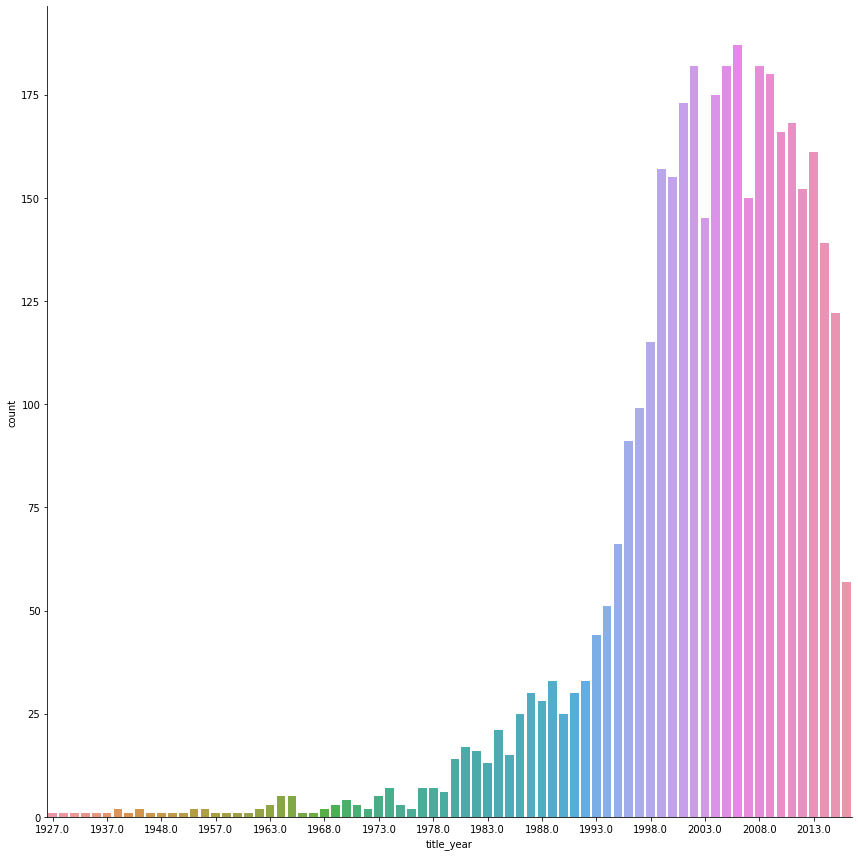

In [112]:
g = sns.catplot('title_year', data=df_list, kind='count', height=12)
g.set_xticklabels(step=5);

In [113]:
px.area(df_list, x="title_year", y="imdb_score", color="genres", line_group="genres")

In [114]:
px.scatter(df_list, x="title_year", y="imdb_score")

The movie year grouped by the IMDB score

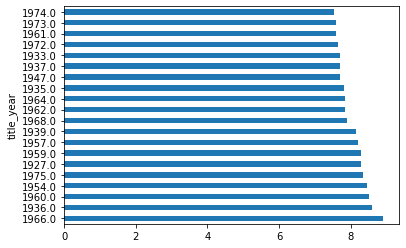

In [115]:
df_list.groupby('title_year')['imdb_score'].mean().sort_values(ascending=False).head(20).plot(kind='barh');

The movie year grouped by the facebook likes. The recent movie has more the facebook likes since the recent movie has more attention by SNS.

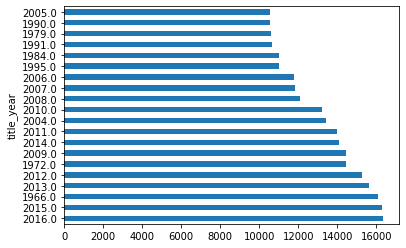

In [116]:
df_list.groupby('title_year')['cast_total_facebook_likes'].mean().sort_values(ascending=False).head(20).plot(kind='barh');

#### 4.2.2 The number of movies and countries

I find that the number of movies in America and English language far outnumber than the rest of world. 

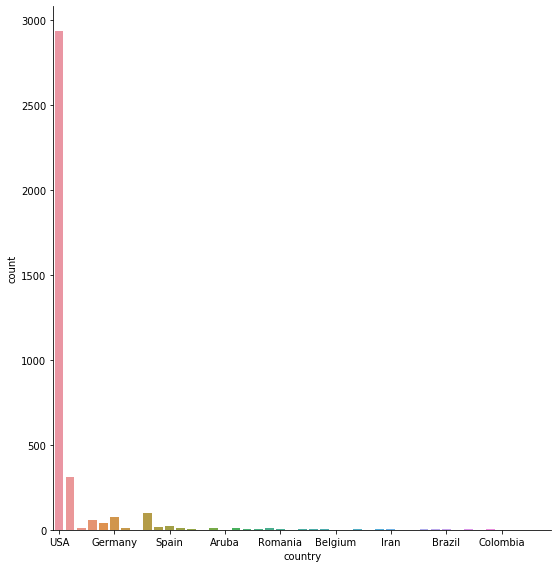

In [117]:
g = sns.catplot('country', data=df_list, kind='count', height=8)
g.set_xticklabels(step=5);

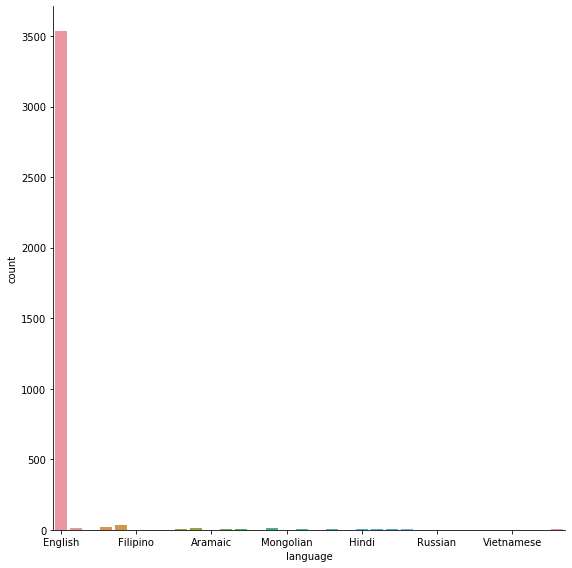

In [118]:
g = sns.catplot('language', data=df_list, kind='count', height=8)
g.set_xticklabels(step=5);

#### 4.2.3 Movie genres

Action and comedy movies are the most produced movie in the world. 

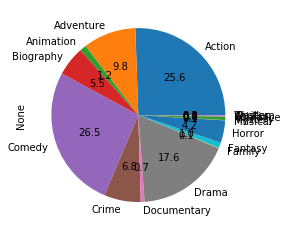

In [119]:
df_list.groupby('genres').size().plot(kind='pie', autopct='%.1f');

Adventure and action movies are most successful in terms of IMDB score and net proft in 2009.

In [120]:
px.scatter(df_list.query("title_year==2009"), x="net_profit", y="imdb_score", size="num_user_for_reviews", color="genres",
           hover_name="director_name", log_x=True, size_max=60)

Action and musical movies are the most profitable movie. 

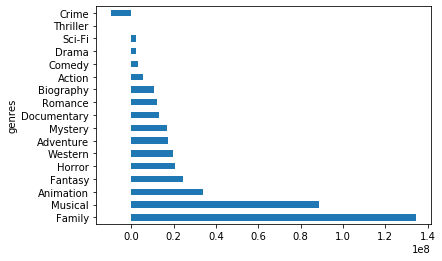

In [121]:
df_list.groupby('genres')['net_profit'].mean().sort_values(ascending=False).head(20).plot(kind='barh');

Western genre has the highest average IMDB scores.

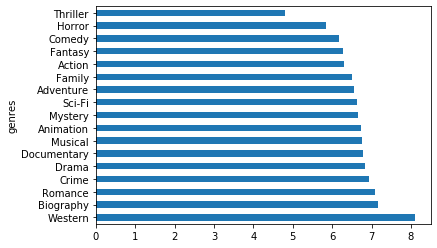

In [122]:
df_list.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(20).plot(kind='barh');

#### 4.2.4 Movie directors

Steven Spielberg has been making movies the most among movie directors. 

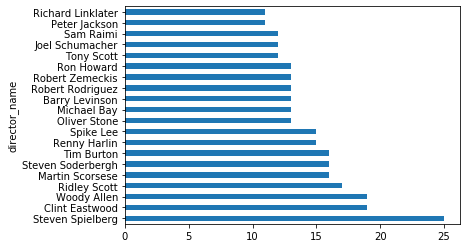

In [123]:
df_list.groupby('director_name').size().sort_values(ascending=False).head(20).plot(kind='barh')

Akira Kurosawa is the most successful movie director in terms of IMDB score.

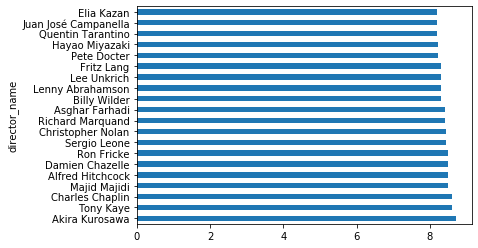

In [124]:
df_list.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(20).plot(kind='barh');

#### 4.2.5 ETC

IMDB scores is slightly skewed, but we can say that the IMDB score is nornally distributed.

In [125]:
px.bar(df_list, x = 'imdb_score')

Avatar by James Cameron is the most commercially successful movie in the world.

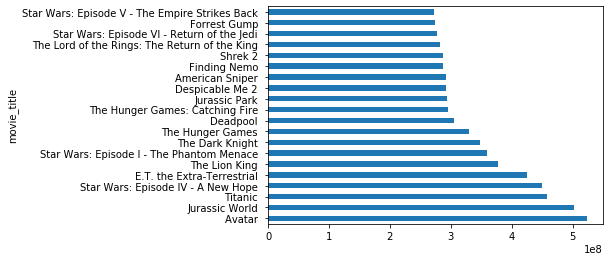

In [126]:
df_list.groupby('movie_title')['net_profit'].mean().sort_values(ascending=False).head(20).plot(kind='barh');

### 4.3 Linear trends of data

#### 4.3.1 Net profit and IMDB

As I expected, the net profit of the movie is positively associated with IMDB.

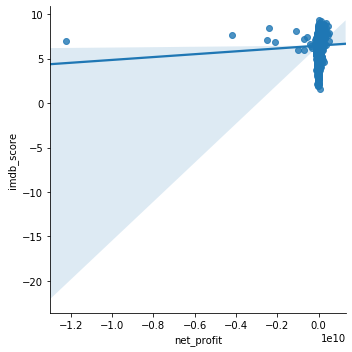

In [127]:
sns.lmplot('net_profit', 'imdb_score', data=df_list, fit_reg=True);

#### 4.3.2 The number of user for review and IMDB / / number of voted usres and IMDB // number of cirtic review and IMDB¶

Unsurprisingly, the number of user for review, the number of voted users ,and the number of critic review are positively associated with IMDB. 

In [128]:
px.scatter(df_list, x="num_user_for_reviews", y="imdb_score", trendline='ols')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [129]:
px.scatter(df_list, x="num_voted_users", y="imdb_score", trendline='ols')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [130]:
px.scatter(df_list, x="num_critic_for_reviews", y="imdb_score", trendline='ols')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



#### 4.3.3 Director facebook likes and IMDB // total actor facebook likes and IMDB¶

As my expectation, the number of facebook likes of directors and actors is positively associated with IMDB

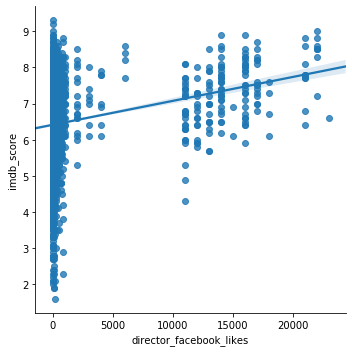

In [131]:
sns.lmplot("director_facebook_likes", "imdb_score", df_list);

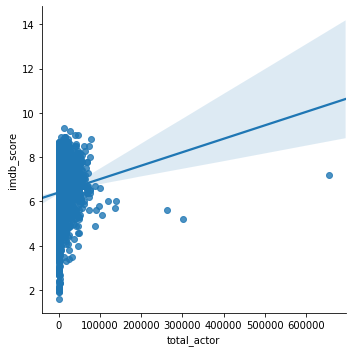

In [132]:
sns.lmplot("total_actor", "imdb_score", df_list);

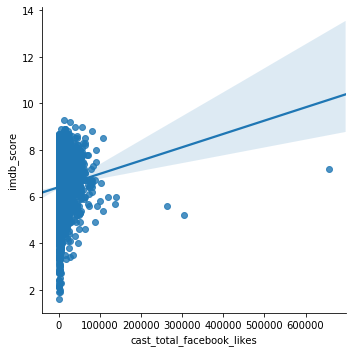

In [133]:
sns.lmplot("cast_total_facebook_likes", "imdb_score", df_list);

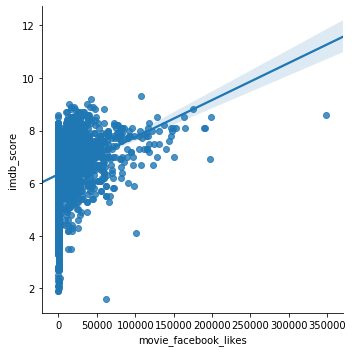

In [134]:
sns.lmplot("movie_facebook_likes", "imdb_score", df_list);

#### 4.3.4 Facenumber in poster and IMDB

Surprisingly, the number of face in poster is negatively associated with IMDB.

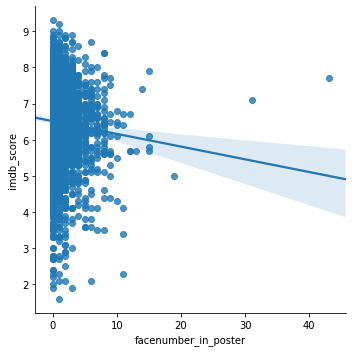

In [135]:
sns.lmplot("facenumber_in_poster", "imdb_score", df_list);

## 5. Correlation Analysis

### 5.1 Load statistic analysis packages

In [136]:
df_list.corr()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,net_profit,total_actor
num_critic_for_reviews,1.000000,0.176320,0.237772,0.165306,0.457302,0.590676,0.230965,-0.036865,0.561481,0.103119,0.420163,0.249050,0.351817,0.701891,0.035301,0.222773
director_facebook_likes,0.176320,1.000000,0.123934,0.091311,0.141164,0.305980,0.121629,-0.047082,0.220679,0.018044,-0.046791,0.119699,0.193955,0.163339,0.024461,0.117978
actor_3_facebook_likes,0.237772,0.123934,1.000000,0.252562,0.261457,0.246986,0.481281,0.103482,0.195423,0.036394,0.115456,0.546777,0.062771,0.247783,0.042379,0.443873
actor_1_facebook_likes,0.165306,0.091311,0.252562,1.000000,0.141118,0.176403,0.947364,0.054137,0.120842,0.015633,0.095796,0.389654,0.092247,0.127285,0.026818,0.958713
gross,0.457302,0.141164,0.261457,0.141118,1.000000,0.620400,0.220055,-0.036828,0.546696,0.097125,0.051465,0.234758,0.216317,0.350029,0.203477,0.201355
num_voted_users,0.590676,0.305980,0.246986,0.176403,0.620400,1.000000,0.238413,-0.039512,0.779514,0.064865,0.023280,0.233249,0.482744,0.511876,0.121703,0.229158
cast_total_facebook_likes,0.230965,0.121629,0.481281,0.947364,0.220055,0.238413,1.000000,0.075774,0.173732,0.026649,0.126245,0.637676,0.103959,0.194294,0.039586,0.997486
facenumber_in_poster,-0.036865,-0.047082,0.103482,0.054137,-0.036828,-0.039512,0.075774,1.000000,-0.084140,-0.022545,0.069143,0.067365,-0.068558,0.010693,0.011165,0.072046
num_user_for_reviews,0.561481,0.220679,0.195423,0.120842,0.546696,0.779514,0.173732,-0.084140,1.000000,0.070171,0.020653,0.182325,0.325055,0.366636,0.094444,0.165058
budget,0.103119,0.018044,0.036394,0.015633,0.097125,0.064865,0.026649,-0.022545,0.070171,1.000000,0.045535,0.033652,0.029740,0.049612,-0.954688,0.024900


In [137]:
cor = df_list.corr()

I sort out the association between IDMB score and other varialbes. The highest positive association is the number of voted users followed by the number of critic, and the number of user reviews.

In [138]:
cor_df = cor.sort_values(by='imdb_score', ascending=False)
print(cor_df['imdb_score'])

imdb_score                   1.000000
num_voted_users              0.482744
num_critic_for_reviews       0.351817
num_user_for_reviews         0.325055
movie_facebook_likes         0.286994
gross                        0.216317
director_facebook_likes      0.193955
total_actor                  0.107465
cast_total_facebook_likes    0.103959
actor_2_facebook_likes       0.098150
actor_1_facebook_likes       0.092247
actor_3_facebook_likes       0.062771
net_profit                   0.035427
budget                       0.029740
facenumber_in_poster        -0.068558
title_year                  -0.129506
Name: imdb_score, dtype: float64


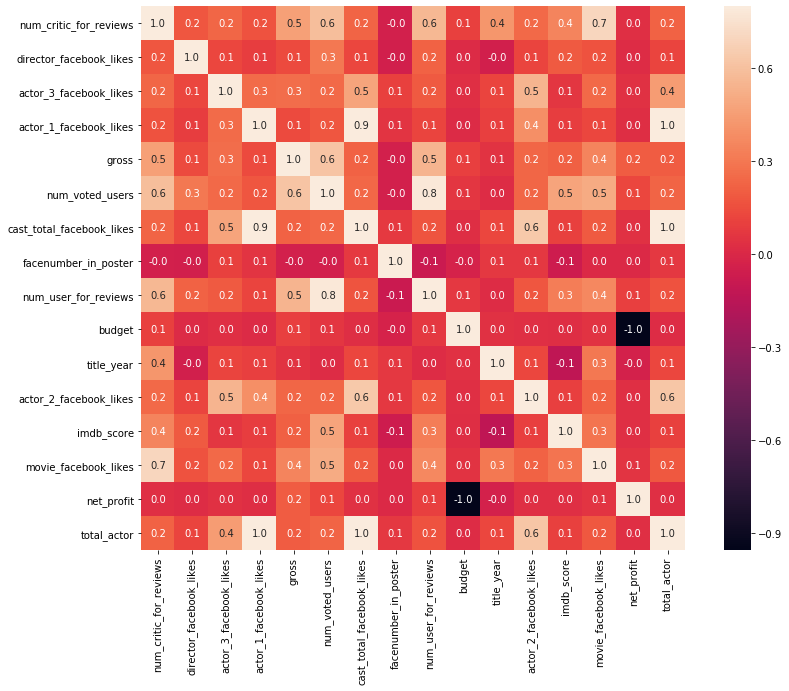

In [139]:
plt.figure(figsize=(14,10))
sns.heatmap(df_list.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

### 5.2 Remove high correlation between variables

In [140]:
highcor = cor > 0.8

In [141]:
highcor

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,net_profit,total_actor
num_critic_for_reviews,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
director_facebook_likes,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
actor_3_facebook_likes,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
actor_1_facebook_likes,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
gross,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
num_voted_users,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
cast_total_facebook_likes,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
facenumber_in_poster,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
num_user_for_reviews,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
budget,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


There are lists that the correlation between each variables are higher than 0.8
(cast_total_facebook_likes/actor_1_facebook_likes), (total_actor/actor_1_facebook_likes), (cast_total_facebook_likes/actor_1_facebook_likes) (budget/net_profit)
actor_1_facebook_likes / total actor) 


It seems like the variable (actor_1_facebook_likes) seems to have high correlation with other varialbes. I get rid of this variables from original data set (df_list) to conduct regression analysis.

#### 5.2.1 Drop the uncessessary varialbes

In [142]:
df_list_reg = df_list.drop(['actor_1_facebook_likes'], axis=1)
df_list_reg.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,...,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,net_profit,total_actor
0,James Cameron,723.0,0.0,855.0,Joel David Moore,760505847.0,Action,CCH Pounder,Avatar,886204,...,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,33000,523505847.0,2791.0
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,309404152.0,Action,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,0,9404152.0,46000.0
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,200074175.0,Action,Christoph Waltz,Spectre,275868,...,994.0,English,UK,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,11554.0
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,448130642.0,Action,Tom Hardy,The Dark Knight Rises,1144337,...,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,73000.0
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,73058679.0,Action,Daryl Sabara,John Carter,212204,...,738.0,English,USA,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,1802.0


In [143]:
df_list_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3690 entries, 0 to 5042
Data columns (total 23 columns):
director_name                3690 non-null object
num_critic_for_reviews       3690 non-null float64
director_facebook_likes      3690 non-null float64
actor_3_facebook_likes       3690 non-null float64
actor_2_name                 3690 non-null object
gross                        3690 non-null float64
genres                       3690 non-null object
actor_1_name                 3690 non-null object
movie_title                  3690 non-null object
num_voted_users              3690 non-null int64
cast_total_facebook_likes    3690 non-null int64
actor_3_name                 3690 non-null object
facenumber_in_poster         3690 non-null float64
num_user_for_reviews         3690 non-null float64
language                     3690 non-null object
country                      3690 non-null object
budget                       3690 non-null float64
title_year                   3690 non-

## 6. Prediction model (Multiple regression)

The correlation does not predict the IMDB scores since many factors are associated with the response variables. In this regard, I tested the multiple regression analysis to predict the IMDB scores with many variables that I am given.

In [144]:
import pandas as pd
import statsmodels.api as sm

In [145]:
y = df_list_reg['imdb_score']
X = df_list_reg[['director_facebook_likes','num_critic_for_reviews','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','movie_facebook_likes','net_profit','total_actor']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     150.2
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          2.00e-242
Time:                        20:43:31   Log-Likelihood:                -4841.5
No. Observations:                3690   AIC:                             9703.
Df Residuals:                    3680   BIC:                             9765.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.1036      0.030    202.169      0.000       6.044       6.163
director_facebook_likes    1.683e-05   5.06e-06      3.326      0.001    6.91e-06    2.67e-05
num_critic_for_reviews        0.0013      0.000      6.713      0.000       0.001       0.002
num_voted_users            3.773e-06   1.75e-07     21.526      0.000    3.43e-06    4.12e-06
cast_total_facebook_likes -8.875e-05   1.11e-05     -7.970      0.000      -0.000   -6.69e-05
facenumber_in_poster         -0.0233      0.007     -3.183      0.001      -0.038      -0.009
num_user_for_reviews         -0.0004   6.05e-05     -7.188      0.000      -0.001      -0.000
movie_facebook_likes      -1.057e-06   1.01e-06     -1.042      0.297   -3.05e-06    9.32e-07
net_profit                -5.546e-11   6.46e-11     -0.859      0.391   -1.82e-10    7.12e-11
total_actor                8.981e-05   1.14e-05      7.874      0.000    6.74e-05       0.000
==============================================================================
Omnibus:                      469.495   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.975
Skew:                          -0.834   Prob(JB):                    2.42e-183
Kurtosis:                       4.639   Cond. No.                     4.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Among the variables, one unit increase in the number of director facebook likes, the number of critics for reviews, and total actor facebook like leads to an increase in IMDB scores. Except movie facebook likes and net profit, all the varialbes are statistically significant.

## 7. Classification

### 7.1 Decision Tree

#### 7.1.1 Importing Classfiers

In [146]:
# first check what version of sklearn is running in your machine.
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# run the latest sklearn

The scikit-learn version is 0.21.2.


In [147]:
# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

#### 7.1.2 Change numeric values to categorical value

less than 4, 4-6, 6-8 and 8-10, which represents bad, OK, good and excellent respectively

In [148]:
bins = [0, 4, 6, 8, np.inf]
names = ['bad', 'OK', 'good', 'excellent']

df_list_reg['Imdb_Range'] = pd.cut(df_list_reg['imdb_score'], bins, labels=names)

In [149]:
df_list_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3690 entries, 0 to 5042
Data columns (total 24 columns):
director_name                3690 non-null object
num_critic_for_reviews       3690 non-null float64
director_facebook_likes      3690 non-null float64
actor_3_facebook_likes       3690 non-null float64
actor_2_name                 3690 non-null object
gross                        3690 non-null float64
genres                       3690 non-null object
actor_1_name                 3690 non-null object
movie_title                  3690 non-null object
num_voted_users              3690 non-null int64
cast_total_facebook_likes    3690 non-null int64
actor_3_name                 3690 non-null object
facenumber_in_poster         3690 non-null float64
num_user_for_reviews         3690 non-null float64
language                     3690 non-null object
country                      3690 non-null object
budget                       3690 non-null float64
title_year                   3690 non-

In [150]:
df_for_class = df_list_reg.drop(columns=['country', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'language', 'imdb_score'])

In [151]:
df_for_class.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,net_profit,total_actor,Imdb_Range
0,723.0,0.0,855.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,523505847.0,2791.0,good
1,302.0,563.0,1000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0,9404152.0,46000.0,good
2,602.0,0.0,161.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,85000,-44925825.0,11554.0,good
3,813.0,22000.0,23000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,164000,198130642.0,73000.0,excellent
5,462.0,475.0,530.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,24000,-190641321.0,1802.0,good


In [152]:
#mappling or replacing
df_for_class = df_for_class.replace({'Imdb_Range': 'bad'}, {'Imdb_Range': '0'})
df_for_class = df_for_class.replace({'Imdb_Range': 'OK'}, {'Imdb_Range': '1'})
df_for_class = df_for_class.replace({'Imdb_Range': 'good'}, {'Imdb_Range': '2'})
df_for_class = df_for_class.replace({'Imdb_Range': 'excellent'}, {'Imdb_Range': '3'})

In [153]:
df_for_class.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,net_profit,total_actor,Imdb_Range
0,723.0,0.0,855.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,523505847.0,2791.0,2
1,302.0,563.0,1000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0,9404152.0,46000.0,2
2,602.0,0.0,161.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,85000,-44925825.0,11554.0,2
3,813.0,22000.0,23000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,164000,198130642.0,73000.0,3
5,462.0,475.0,530.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,24000,-190641321.0,1802.0,2


In [154]:
df_for_class.groupby('Imdb_Range').size().sort_values(ascending=False).head(20)

Imdb_Range
2    2417
1    1030
3     154
0      89
dtype: int64

In [155]:
# declare X variables and y variable

y = df_for_class['Imdb_Range']
X = df_for_class.drop('Imdb_Range', axis=1)
print(y.shape, X.shape)

(3690,) (3690, 14)


In [156]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize DecisionTreeClassifier() ... name your decision model "
dt = DecisionTreeClassifier()
# Train a decision tree model
dt = dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [157]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.6639566395663956
--------------------------------------------------------
[[  2  15   6   0]
 [ 23 171 141   0]
 [ 13 141 534  16]
 [  0   0  17  28]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.05      0.09      0.07        23
           1       0.52      0.51      0.52       335
           2       0.77      0.76      0.76       704
           3       0.64      0.62      0.63        45

    accuracy                           0.66      1107
   macro avg       0.49      0.49      0.49      1107
weighted avg       0.67      0.66      0.67      1107

--------------------------------------------------------


The result of tree decision model shows 67.5% accuracy of its prediction.

In [158]:
print(len(y_test))

1107


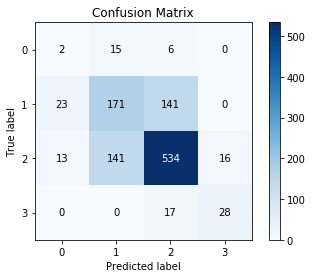

In [159]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [160]:
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")

True

In [161]:
from IPython.display import IFrame
IFrame('data/dt.pdf', width=1000, height=1000)


In [162]:
# dt = DecisionTreeClassifier()    # develop a very complex ("full-grown") tree
# You can make a simpler decision tree ... name the model "dt_simple" (max_depth=3, min_samples_leaf=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt_simple = dt_simple.fit(X_train, y_train)
dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [163]:
# Find out the performance of this model & interpret the results
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test)))



0.6856368563685636
--------------------------------------------------------
[[  0  11  12   0]
 [  0 103 232   0]
 [  0  63 637   4]
 [  0   0  26  19]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.58      0.31      0.40       335
           2       0.70      0.90      0.79       704
           3       0.83      0.42      0.56        45

    accuracy                           0.69      1107
   macro avg       0.53      0.41      0.44      1107
weighted avg       0.66      0.69      0.65      1107

--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [164]:
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt_simple, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt_simple.pdf")

True

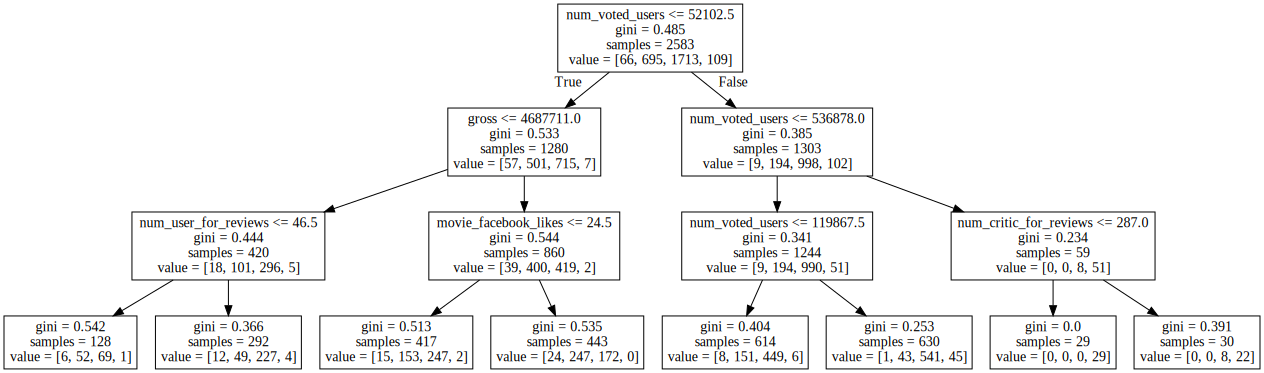

In [165]:
# another option

from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt_simple, out_file=None, feature_names=X.columns))

Interpreting decision tree
- Num_voted_users (The number of voted users) seems to be the most important factor to classify the IRDB score. 
- All 59 movies which are more than 536,878 numbers of voted users are categorized as good or excellent movies.
- All 8 movies which are more than 536,878 numbers of voted users and less than 287 number of critic reviews are categorized as good movies.

### 7.2 KNN

In [166]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize DecisionTreeClassifier() ... name your decision model "
knn = KNeighborsClassifier()
# Train a decision tree model
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [167]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html

#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, knn.predict(X_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.



0.5763324299909666
--------------------------------------------------------
[[  0   7  16   0]
 [  3  84 248   0]
 [  3 146 551   4]
 [  0   8  34   3]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.34      0.25      0.29       335
           2       0.65      0.78      0.71       704
           3       0.43      0.07      0.12        45

    accuracy                           0.58      1107
   macro avg       0.36      0.28      0.28      1107
weighted avg       0.53      0.58      0.54      1107

--------------------------------------------------------


The result of KNN classification shows 57.6% accuracy of its prediction.

### 7.3 Random forest classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7100271002710027

In [174]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7100271002710027
[[  0  13  10   0]
 [  0 133 202   0]
 [  0  65 635   4]
 [  0   0  27  18]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.63      0.40      0.49       335
           2       0.73      0.90      0.80       704
           3       0.82      0.40      0.54        45

    accuracy                           0.71      1107
   macro avg       0.54      0.42      0.46      1107
weighted avg       0.69      0.71      0.68      1107



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [175]:
# another method
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
num_voted_users,0.158056
num_user_for_reviews,0.081007
gross,0.078414
num_critic_for_reviews,0.076091
budget,0.072644
net_profit,0.070307
title_year,0.069631
total_actor,0.067127
director_facebook_likes,0.066743
cast_total_facebook_likes,0.065030


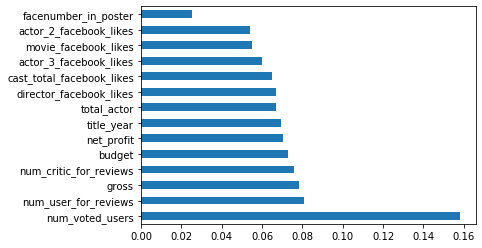

In [176]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

### 7.4 Best classification models

With the analysis of three types of classification models, we can verify which models could be the best prediction model. 
- 1.Decision tree
Accuracy: 0.6856368563685636
- 2.KNN
Accuracy : 0.576
- 3.Random Forest Classifier
Accuracy : 0.7353206

According to the result of the analysis, the random forest classifier is the best classification model among the three classifications.

## 8. Clustering

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

### 8.1 K-means clustering

Before doing K-means clustering, I sort out key variables that need to be clustering analysis. In the random forest classifier, we identify the top 3 important factors of classification 1) num of voted user 2) the number of users for reviews 3) the number of critics for reviews.

In [178]:
df_for_class.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,net_profit,total_actor,Imdb_Range
0,723.0,0.0,855.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,523505847.0,2791.0,2
1,302.0,563.0,1000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0,9404152.0,46000.0,2
2,602.0,0.0,161.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,85000,-44925825.0,11554.0,2
3,813.0,22000.0,23000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,164000,198130642.0,73000.0,3
5,462.0,475.0,530.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,24000,-190641321.0,1802.0,2


In [179]:
df_cluster = df_for_class[['num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'Imdb_Range']]

In [180]:
df_cluster.head()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,Imdb_Range
0,886204,3054.0,723.0,2
1,471220,1238.0,302.0,2
2,275868,994.0,602.0,2
3,1144337,2701.0,813.0,3
5,212204,738.0,462.0,2


In [181]:
df_cluster["Imdb_Range"]= df_cluster["Imdb_Range"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [183]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3690 entries, 0 to 5042
Data columns (total 4 columns):
num_voted_users           3690 non-null int64
num_user_for_reviews      3690 non-null float64
num_critic_for_reviews    3690 non-null float64
Imdb_Range                3690 non-null int32
dtypes: float64(2), int32(1), int64(1)
memory usage: 129.7 KB


In [184]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#four clusters
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [185]:
k_means.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [186]:
#clustering results
k_means.labels_

array([2, 3, 1, ..., 0, 0, 0])

In [187]:
#cluster centroids or centers
k_means.cluster_centers_

array([[3.89123763e+04, 1.84714771e+02, 1.22209671e+02, 1.57612391e+00],
       [1.84279831e+05, 5.43754248e+02, 2.49722876e+02, 1.95294118e+00],
       [9.57817911e+05, 2.02822222e+03, 3.45977778e+02, 2.93333333e+00],
       [4.35172485e+05, 1.02887983e+03, 3.64871245e+02, 2.26609442e+00]])

In [188]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,2
1,3
2,1
3,2
4,1


In [189]:
df2 = df_cluster.join(df1)
df2.head()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,Imdb_Range,cluster
0,886204,3054.0,723.0,2,2.0
1,471220,1238.0,302.0,2,3.0
2,275868,994.0,602.0,2,1.0
3,1144337,2701.0,813.0,3,2.0
5,212204,738.0,462.0,2,3.0


#### 8.1 Profiling each cluster: Profiling is the key purpose of clustering analysis

In [190]:
df2.groupby('cluster').mean()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,Imdb_Range
cluster,,,,
0.0,99501.100365,311.287865,158.681113,1.692518
1.0,141258.954683,429.123867,197.067976,1.697885
2.0,167549.761905,537.523810,229.404762,1.690476
3.0,178330.357143,541.719048,239.180952,1.771429


- [Cluster 0] Low number of voted users / Low number of user voted reviews / low number of critic for reviews / Bad Imdb_Range
- [Cluster 1] mid number of voted users / mid number of user voted reviews / mid number of critic for reviews / Ok Imdb_Range
- [Cluster 2] mid number of voted users / mid number of user voted reviews / mid number of critic for reviews / Good Imdb_Range
- [Cluster 3] High number of voted users / High number of user voted reviews / High number of critic for reviews / Excellent Imdb_Range

#### 8.2 Normalizing the data (often necessary for clustering analysis)

In [191]:
df_norm = (df_cluster - df_cluster.mean()) / (df_cluster.max() - df_cluster.min())
df_norm.head()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,Imdb_Range
0,0.462176,0.537790,0.685947,0.095212
1,0.216576,0.178612,0.166835,0.095212
2,0.100961,0.130353,0.536749,0.095212
3,0.614947,0.467972,0.796921,0.428546
5,0.063283,0.079720,0.364122,0.095212


In [192]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#four clusters
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [193]:
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [194]:
# cluster labels

k_means.labels_

array([2, 3, 3, ..., 1, 1, 1])

In [195]:
# find out cluster centers

k_means.cluster_centers_

array([[-0.03942715, -0.02587758, -0.06671833, -0.26509074],
       [-0.02224033, -0.02093894, -0.05261621,  0.09956011],
       [ 0.29880873,  0.18324212,  0.17497318,  0.41619994],
       [ 0.0714681 ,  0.06870782,  0.23834571,  0.08491418]])

In [196]:
# convert cluster lables to dataframe

df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,2
1,3
2,3
3,2
4,3


In [197]:
# join df_norm & df1

df2 = df_norm.join(df1)
df2.head()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,Imdb_Range,cluster
0,0.462176,0.537790,0.685947,0.095212,2.0
1,0.216576,0.178612,0.166835,0.095212,3.0
2,0.100961,0.130353,0.536749,0.095212,3.0
3,0.614947,0.467972,0.796921,0.428546,2.0
5,0.063283,0.079720,0.364122,0.095212,3.0


In [198]:
df2.groupby(['cluster']).mean() 

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,Imdb_Range
cluster,,,,
0.0,0.003622,0.001282,0.002511,-0.000180
1.0,-0.003346,-0.004996,-0.008850,-0.011962
2.0,0.022777,0.026102,0.033836,0.006132
3.0,0.030250,0.029168,0.059964,0.003237


### In this data set, it could be hard for us to interprete the cluster analysis by using normalization of data

### 8.2. Hierarchical Clustering Algorithms

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [200]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(df_for_class)
agg.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

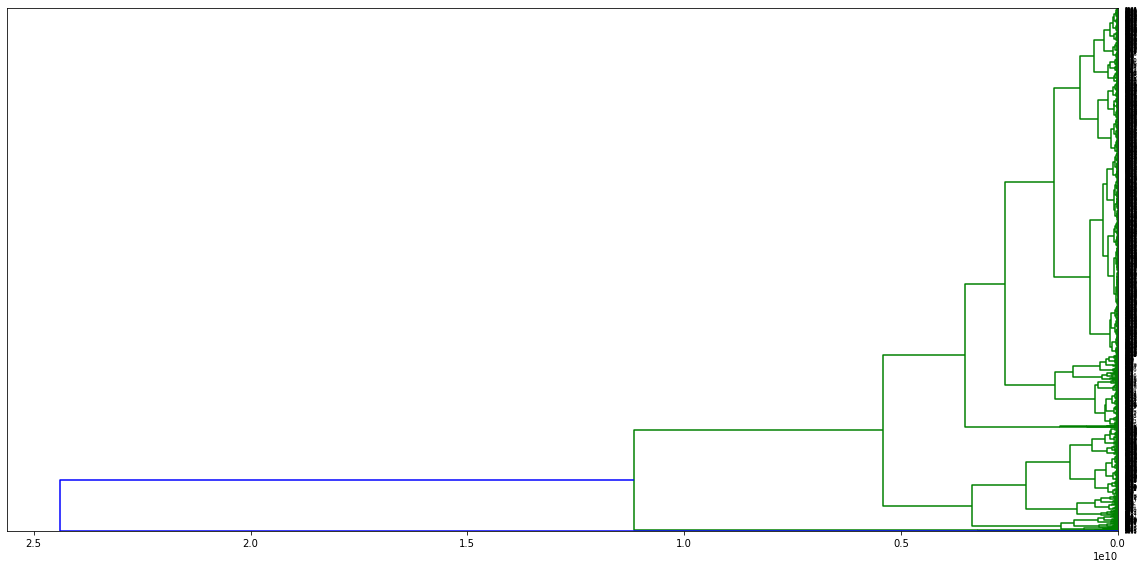

In [202]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(df_for_class)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

Let's ask for 4 clusters only (p = 4)

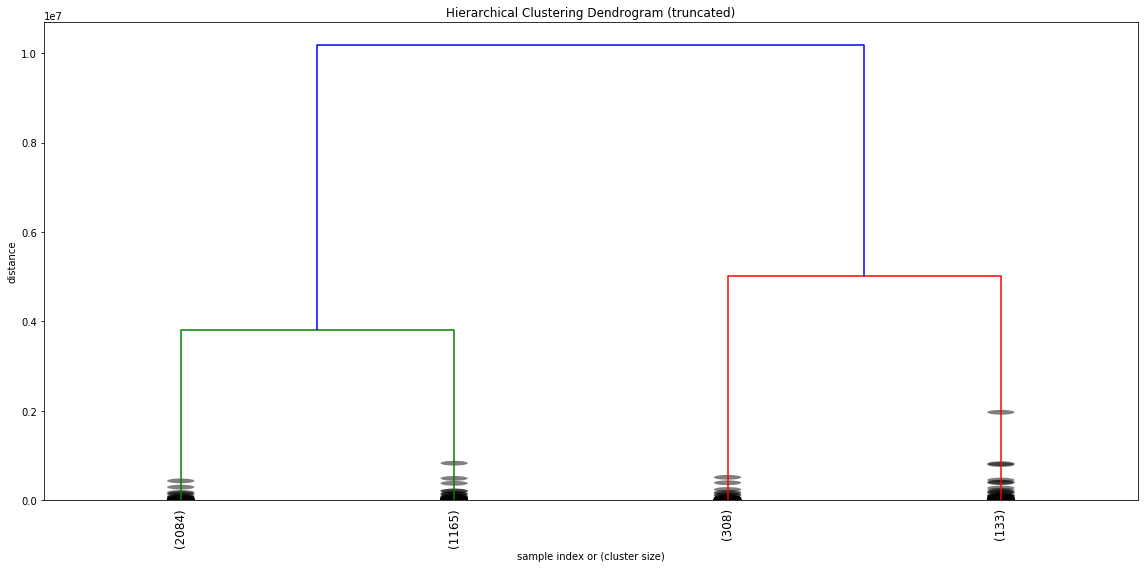

In [203]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(df_cluster)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [204]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,0


In [205]:
df2 = df_cluster.join(df1)
df2.head()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,Imdb_Range,cluster
0,886204,3054.0,723.0,2,1.0
1,471220,1238.0,302.0,2,1.0
2,275868,994.0,602.0,2,1.0
3,1144337,2701.0,813.0,3,1.0
5,212204,738.0,462.0,2,1.0


In [206]:
df2.groupby('cluster').mean()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,Imdb_Range
cluster,,,,
0.0,111152.994293,338.691806,166.609050,1.699552
1.0,128503.026235,418.154321,198.566358,1.697531
2.0,37617.250000,203.250000,180.500000,1.750000
3.0,27580.000000,172.000000,66.000000,1.000000


- [Cluster 0] High number of voted users / High number of user voted reviews / High number of critic for reviews / Excellent Imdb_Range
- [Cluster 1] mid number of voted users / mid number of user voted reviews / mid number of critic for reviews / Good Imdb_Range
- [Cluster 2] mid number of voted users / mid number of user voted reviews / mid number of critic for reviews / Ok Imdb_Range
- [Cluster 3] Low number of voted users / Low number of user voted reviews / low number of critic for reviews / Bad Imdb_Range

## 9 The result of study

### 9.1 Descriptive trends of data

#### 9.1.1 The number of movies and time

The number of movies is increased with time. This is because the growing economy in the world enables movie producers to invest and create more movies than ever. An increase in the number of movies is not directly associated with the IMDB score. But the recent movie has more face_book_likes than in the past movie.

#### 9.1.2 The number of movies and countries

According to the result of descriptive data, we can find that the number of movies in America far outnumber than the rest of the world. Due to this fact, the language of the movie is mostly English. 

#### 9.1.3 Movie genres

Action and comedy movies are the most produced movie in the world. Surprisingly, the most profitable movie genres are not both action and comedy movies. The most profitable movies are family movies. This is due to the fact that action movies cost more money than other movies. So, it is risky to produce action movies.

### 9.2 The linear trend of data

With this analysis, we can narrow down the variables that are associated with IMDB scores. At first, we only select continuous variables that enable us to track the association between variables. Secondly, we select variables that are related to our assumption and hypothesis (e.g. The popularity of director and actors, and the profit of movies).

#### 9.2.1 Net profit and IMDB 

As I expected, the net profit of the movie is positively associated with IMDB. In general, the commercial success of the movie has a huge impact on the reputation of the movie. People are more likely to watch a movie if the movie is interesting and exciting. If not, it is natural that few people watch a movie, in turn, the movie makers do not get any profit.

#### 9.2.2 The number of user for review and IMDB  / / number of voted usres and IMDB // number of cirtic review and IMDB

Unsurprisingly, the number of users for review, the number of voted users, and the number of critic reviews are positively associated with IMDB. One thing that we could not expect is that the slopes are steeper than any other predictor variables. In general, a better movie is tended to have more reviews and votings than any other movie since many people have watched movies and they are more likely to leave the comments on the website.

#### 9.2.3 Director facebook likes and IMDB // total actor facebook likes and IMDB

As my expectation, the number of facebook likes of directors and actors is positively associated with IMDB. This illustrates that the popularity of director and actors drive IMDB scores. It could be possible that many famous movie directors are more likely to produce a better movie or they could get more investment from movie makers. Also, popular actors only work with famous directors or work in high investment movies. 

#### 9.2.4 Facenumber in poster and IMDB

Surprisingly, the number of face in the poster is negatively associated with IMDB. It does not necessarily mean that the number of faces affects IMDB scores, but it could be somewhat related. 

### 9.3 Correlation result

- I find out that there are five top lists of variables that has correlate with IMDB score.
1) num_voted_users (0.482744) 2) num_critic_for_reviews (0.351817) 3) num_user_for_reviews (0.325055) 4) movie_facebook_likes    (0.286994) 5) gross (0.216317). These are key varialbes that I am looking for. For the regression analysis, I will keep this varialbes in mind.
- I also find out that there are high correlation between varialbes.1) (cast_total_facebook_likes/actor_1_facebook_likes), 2)(total_actor/actor_1_facebook_likes), 3)(cast_total_facebook_likes/actor_1_facebook_likes), 4)(budget/net_profit) 5) (actor_1_facebook_likes / total actor). According to the correlation between variables, I get rid of actor_1_facebook likes. Becuase this varialbe distrubs my prediction model.  



### 9.4 Prediction model (Multiple regression)

- The correlation does not predict the IMDB scores since many factors are associated with the response variables. In this regard, I tested the multiple regression analysis to predict the IMDB scores with many variables that I am given. In the correlation analysis, I find out that the number of facebook likes of actor 1 is highly associated with many other independent variables, so I did not include this variable in the multiple regression model. 
- Among the variables, one unit increase in the number of director facebook likes, the number of critics for reviews, and total actor facebook like leads to an increase in IMDB scores. On the contrary, one unit increase in cast total facebook likes, face number in the poster, the number of users for reviews and movie facebook likes, and net profit leads to decrease IMDB scores. This illustrates that the popularity of directors and actors is a more significant factor than the popularity of the movie and the profits of movies.

### 9.5 Classfication

- 1.Decision tree
Accuracy: 0.6856368563685636

Interpreting decision tree
- Num_voted_users (The number of voted users) seems to be the most important factor to classify the IMDB score. 
- All 59 movies which are more than 536,878 numbers of voted users are categorized as good or excellent movies.
- All 8 movies which are more than 536,878 numbers of voted users and less than 287 number of critic reviews are categorized as good movies.



- 2.KNN
Accuracy : 0.576


- 3.Random Forest Classifier
Accuracy : 0.7353206

We identify the top 3 important factors of classification 1) num of voted user 2) the number of users for reviews 3) the number of critics for reviews.

- Overall Conclusion

With the analysis of three types of classification models, we can verify which models could be the best prediction model. According to the result of the analysis, the random forest classifier is the best classification model among the three classifications.

### 9.6 Clustering

K-means clustering

- [Cluster 0] Low number of voted users / Low number of user voted reviews / low number of critic for reviews / Bad Imdb_Range
- [Cluster 1] mid number of voted users / mid number of user voted reviews / mid number of critic for reviews / Ok Imdb_Range
- [Cluster 2] mid number of voted users / mid number of user voted reviews / mid number of critic for reviews / Good Imdb_Range
- [Cluster 3] High number of voted users / High number of user voted reviews / High number of critic for reviews / Excellent Imdb_Range

Hierarchical Clustering Algorithms

- [Cluster 0] High number of voted users / High number of user voted reviews / High number of critic for reviews / Excellent Imdb_Range
- [Cluster 1] mid number of voted users / mid number of user voted reviews / mid number of critic for reviews / Good Imdb_Range
- [Cluster 2] mid number of voted users / mid number of user voted reviews / mid number of critic for reviews / Ok Imdb_Range
- [Cluster 3] Low number of voted users / Low number of user voted reviews / low number of critic for reviews / Bad Imdb_Range

Both of K-means clustering and Hierarchical Clustering Algorithms have the same result of clustering. A high number of voted users voted reviews, and the number of critics for reviews of movies are tended to have a higher IMDB score. On the contrary, A low number of voted users,  voted reviews, and the number of critics for reviews of movies appear to have a lower IMDB score.

### 6.5 Conclusion

Throughout the analysis, I conclude that several factors play a key role in driving the IMDB scores. In my hypothesis, I assumed that the popularity of movie director and actor, and the net profit of movie are important factors that increase the overall amount of IMDB scores. The association between the IMDB scores and several independent variables shows the positive relationship in net profit, number of users of reviews, director facebook likes, number of a critic of reviews, the total cast number of facebook likes, and the total actor facebook likes. Only in the number of facebook likes, I can find the negative association between the IMDB ratings. Surprisingly, the multiple regression results show that we can find a positive coefficient in the person's popularity index such as the facebook likes of actor, movie, director. Surprisingly, I find the negative coefficient in total facebook likes, face number in the poster, the number of users for reviews and movie facebook likes, and net profit. In this regard, the movie makers and investors are more care about recruiting popular movie directors and actors for increasing IMDB scores. According to the classification analysis, the number of voted users, number of users for reviews, and the number of critics for reviews are critical factors to classify movies. Furthermore, a high number of voted users, voted reviews, and the number of critics for reviews of movies are tended to have a higher IMDB score. So, movie producers should consider these three main factors that drive the IMDB score.